# BI-PRS: semestrální projekt 3

Cílem třetího semestrálního projektu je analýza hrubého domácího produktu evropských zemí. Zaměříme se na srovnání HDP různých evropských zemí v nějakém konkrétním roce a identifikujeme trendy a vzory ve vývoji jejich ekonomik. Dále se pokusíme porozumět faktorům, které ovlivňují rozdíly v HDP mezi jednotlivými zeměmi a jakým způsobem politické, sociální a ekonomické faktory formují ekonomickou prosperitu Evropy. Naše analýza by měla poskytnout ucelený pohled na ekonomickou situaci a trendy v Evropě a sloužit jako základ pro diskusi o možných politikách a opatřeních pro podporu ekonomického růstu a prosperity v regionu.

Náš tým se skládá ze tří lidí: Ruslana Orazbekova (orazbrus), Nelly Shikina (shikinel), Daria Sychova (sychodar). Nejprve zjistíme, pro který rok budeme data zkoumat pomocí známého vzorce. Reprezentatntem ve třetím semestrálním projektu je Nelly Shikina.

In [1]:
# K = den narození reprezentanta skupiny (1-31)
# L = počet písmen v příjmení reprezentanta
# M = ((K+L)×47)mod11+1

K <- 16
L <- nchar('Shikina')
M <- ((K + L) * 47) %% 11 + 1
print(M)
print(2011 + M)

[1] 4
[1] 2015


Uvažujeme tedy data z roku 2015.

Nejdříve načteme potřebné knihovny a požadovaný dataset.

In [2]:
library(eurostat)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(lmtest)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




In [3]:
# Retrieving GDP data at market prices in euro per capita
data <- get_eurostat("nama_10_pc", time_format = "num", filters = list(na_item = "B1GQ", unit = "CP_EUR_HAB", time = 2015))

# Display the first rows of data for checking
head(data)

Table nama_10_pc cached at C:\Users\Nelly\AppData\Local\Temp\RtmpIH9hh9/eurostat/c969c5f661382795d91768474846af53.rds



freq,unit,na_item,geo,time,values
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
A,CP_EUR_HAB,B1GQ,EU27_2020,2015,27500
A,CP_EUR_HAB,B1GQ,EU28,2015,29180
A,CP_EUR_HAB,B1GQ,EU15,2015,33810
A,CP_EUR_HAB,B1GQ,EA,2015,31080
A,CP_EUR_HAB,B1GQ,EA20,2015,30830
A,CP_EUR_HAB,B1GQ,EA19,2015,31080


Prozkoumejme, co znamenají jednotlivé sloupce datsetu.

1. **freq**: Tento sloupec udává frekvenci, s jakou jsou data zaznamenána. V tomto případě je to "A", což znamená, že data jsou roční.

2. **unit**: Sloupec `unit` označuje jednotku, v níž jsou hodnoty udávány. Zde je uvedeno "CP_EUR_HAB", což znamená "current prices, euros per inhabitant", tedy hodnoty jsou vyjádřeny v eurech na obyvatele.

3. **na_item**: Tento sloupec označuje položku Národních účtů podle zvoleného kritéria.

4. **geo**: Sloupec `geo` označuje geografickou oblast, pro kterou jsou hodnoty uvedeny.

5. **time**: Tento sloupec obsahuje rok, ke kterému se údaje vztahují.

6. **values**: Sloupec `values` obsahuje samotné hodnoty HDP vyjádřené v eurech na obyvatele pro danou oblast (země/region) a rok.

In [4]:
# Label the data with label_eurostat
data <- label_eurostat(data)
head(data)

freq,unit,na_item,geo,time,values
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
Annual,"Current prices, euro per capita",Gross domestic product at market prices,European Union - 27 countries (from 2020),2015,27500
Annual,"Current prices, euro per capita",Gross domestic product at market prices,European Union - 28 countries (2013-2020),2015,29180
Annual,"Current prices, euro per capita",Gross domestic product at market prices,European Union - 15 countries (1995-2004),2015,33810
Annual,"Current prices, euro per capita",Gross domestic product at market prices,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",2015,31080
Annual,"Current prices, euro per capita",Gross domestic product at market prices,Euro area – 20 countries (from 2023),2015,30830
Annual,"Current prices, euro per capita",Gross domestic product at market prices,Euro area - 19 countries (2015-2022),2015,31080


Je vidět, že dataset obsahuje redundantní sloupce, takže než přejdeme k úkolům samotným, data trochu upravíme. Zbavíme se některých sloupců.

In [5]:
# Drop unnecessary columns
data <- subset(data, select = c("geo", "values"))
head(data)

geo,values
<chr>,<int>
European Union - 27 countries (from 2020),27500
European Union - 28 countries (2013-2020),29180
European Union - 15 countries (1995-2004),33810
"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",31080
Euro area – 20 countries (from 2023),30830
Euro area - 19 countries (2015-2022),31080


In [6]:
# Checking if we have NaN values
any_na <- any(is.na(data))
print(any_na)

[1] TRUE


Náš dataset má NA hodnoty. Podívejme se, kde přesně nám chybí data.

In [7]:
# Identifying missing values
missing_values <- is.na(data)

# Display rows with missing values
rows_with_missing <- data[apply(missing_values, 1, any), ]
print(rows_with_missing)

# A tibble: 2 × 2
  geo                    values
  <chr>                   <int>
1 Bosnia and Herzegovina     NA
2 Kosovo*                    NA


Chybějící hodnoty jsou identifikovány v zemích "Bosnia a Herzegovina" a "Kosovo*". Hodnoty HDP pro tyto země v roce 2015 chybí (označeny jako NA).

In [8]:
# Identifying neighboring countries for Bosnia and Herzegovina and Kosovo
neighbors_BiH <- c("Croatia", "Serbia", "Montenegro")
neighbors_Kosovo <- c("Albania", "North Macedonia", "Serbia")

# Selecting data for neighboring countries
data_neighbors_BiH <- subset(data, geo %in% neighbors_BiH)
data_neighbors_Kosovo <- subset(data, geo %in% neighbors_Kosovo)

# Calculating the average GDP of neighboring countries
mean_BiH <- mean(data_neighbors_BiH$values, na.rm = TRUE)
mean_Kosovo <- mean(data_neighbors_Kosovo$values, na.rm = TRUE)

# Replacing missing values with the averages of neighboring countries
data$values[data$geo == "Bosnia and Herzegovina" & is.na(data$values)] <- mean_BiH
data$values[data$geo == "Kosovo*" & is.na(data$values)] <- mean_Kosovo

# Displaying the modified data
print(data[data$geo %in% c("Bosnia and Herzegovina", "Kosovo*"), ])

# A tibble: 2 × 2
  geo                    values
  <chr>                   <dbl>
1 Bosnia and Herzegovina  7240 
2 Kosovo*                 4447.


Tímto způsobem jsme nahradily chybějící hodnoty průměrným HDP sousedních zemí.

In [9]:
# Checking if we have NaN values
any_na <- any(is.na(data))
print(any_na)

[1] FALSE


Data jsou v pořádku. Pojďme na ty úlohy.

## ✭ Úloha 1

Krátce prezentujeme rozdělení HDP a jeho charakteristiky číselně i graficky. Probereme si, jaké údaje o jednotlivých zemích mohou mít vliv na HDP.

In [10]:
# Basic GDP characteristics
summary(data$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3560   11702   25355   29879   38190  148440 

Tyto číselné charakteristiky poskytují užitečné informace o rozdělení HDP v evropských zemích v roce 2015:

- **Minimální hodnota**: Nejnižší hodnota HDP v eurech na obyvatele z celého souboru je 3560. To ukazuje na nejmenší úroveň ekonomické prosperity mezi zkoumanými zeměmi.

- **První kvartil (1st Qu.)**: Hodnota, pod kterou spadá první čtvrtina dat, je 11702 eur na obyvatele. To znamená, že 25 % zemí má HDP nižší než tato hodnota.

- **Medián**: Medián, což je střední hodnota datového souboru, je 25355 eur na obyvatele. To znamená, že polovina zemí má HDP nižší než tento medián a polovina má vyšší.

- **Průměr (Mean)**: Průměrná hodnota HDP v evropských zemích v roce 2015 je 29879 eur na obyvatele. To je aritmetický průměr všech hodnot HDP.

- **Třetí kvartil (3rd Qu.)**: Hodnota, pod kterou spadá třetí čtvrtina dat, je 38190 eur na obyvatele. To znamená, že 75 % zemí má HDP nižší než tato hodnota.

- **Maximální hodnota**: Nejvyšší hodnota HDP v eurech na obyvatele z celého souboru je 148440. Jedná se o nejvyšší úroveň ekonomické prosperity mezi zkoumanými zeměmi.

Tyto statistické údaje nám poskytují přehled o rozdělení HDP a jeho variabilitě mezi evropskými zeměmi v roce 2015. Pro přehlednost nyní vykreslíme histogram rozdělení HDP v roce 2015.

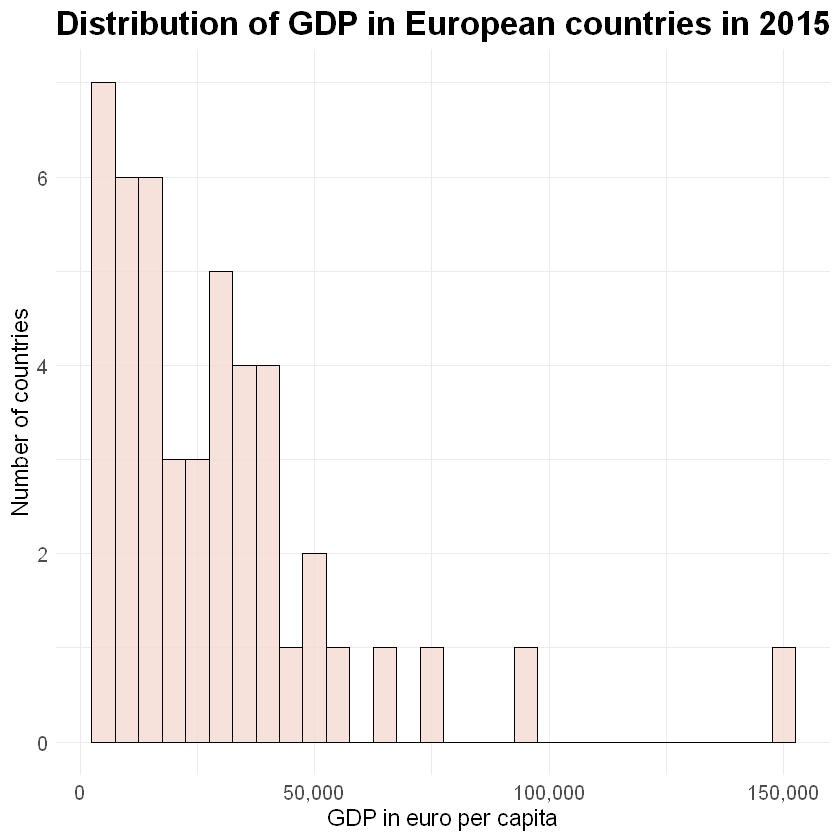

In [11]:
# Histogram
ggplot(data, aes(x = values)) +
  geom_histogram(binwidth = 5000, fill = "#F5DAD2", color = "black", alpha = 0.8) +  # Alpha channel for clarity
  labs(title = "Distribution of GDP in European countries in 2015",
       x = "GDP in euro per capita",
       y = "Number of countries") +
  scale_x_continuous(labels = scales::comma) +  # Adding thousands separators to the x-axis
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14))  # Size of axis labels

Tento histogram zobrazuje rozdělení hrubého domácího produktu (HDP) v evropských zemích v roce 2015. Na osu x je uvedeno HDP v eurech na obyvatele a na osu y počet zemí, které dosáhly dané úrovně HDP.

Graf ukazuje, že většina zemí má HDP mezi 10 000 a 50 000 eur na obyvatele. Existuje také menší počet zemí s HDP nad 50 000 eur na obyvatele, což může zahrnovat země s vyššími úrovněmi ekonomické prosperity.

Různé faktory mohou ovlivňovat HDP zemí. Některé z hlavních faktorů zahrnují:

* **Ekonomická politika**: Makroekonomická politika vlád, včetně monetární politiky a fiskální politiky, může mít vliv na HDP.

* **Obchodní politika**: Otevřenost země obchodu s ostatními zeměmi může ovlivnit HDP prostřednictvím exportu a importu zboží a služeb.

* **Technologický pokrok**: Inovace a technologický pokrok mohou zvyšovat produktivitu a stimulovat růst HDP.

* **Pracovní trh**: Zaměstnanost, úroveň mezd a pracovní podmínky mohou ovlivnit schopnost země generovat HDP.

* **Infrastruktura**: Kvalita infrastruktury, včetně dopravních sítí a telekomunikací, může mít vliv na efektivitu ekonomiky a tím i na HDP.

* **Politická stabilita**: Politická stabilita a právní rámec mohou ovlivnit investice a obchod, což může mít vliv na HDP.

Nyní můžeme pokračovat úlohou 2.

## ✭ Úloha 2

Rozhodly jsme se přidat další [dataset](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023) s informacemi o různých zemích, včetně evropských zemí z našeho projektu.

> This comprehensive dataset provides a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more. With every country represented, this dataset offers a complete global perspective on various aspects of nations, enabling in-depth analyses and cross-country comparisons.

Pro zkoumané země můžeme jako regresory zvolit následující čtyři příznaky:

1. **Průměrný věk obyvatelstva**: tato numerická proměnná může poskytnout informace o demografické struktuře země a jejím vlivu na ekonomiku, jako je například pracovní síla a spotřeba.

2. **Hustota zalidnění**: další numerická proměnná, která může ovlivnit HDP, je hustota zalidnění. Vyšší hustota obvykle znamená větší ekonomickou aktivitu a přístup k většímu trhu.

3. **Jazyk**: tato kategoriální proměnná může být užitečná pro rozlišení mezi zeměmi na základě oficiálního nebo dominantního jazyka. Země se shodným jazykem mohou mít lepší obchodní vztahy a komunikaci, což může mít pozitivní vliv na ekonomiku a cestovní ruch.

4. **Měna**: další kategoriální proměnná, která může být důležitá, je měna, kterou země používá. Země používající euro mohou mít výhodu v obchodě a stabilitě měny ve srovnání s zeměmi, které používají jiné měny.

Nyní bychom mohly použít regresní analýzu k určení vztahu mezi těmito proměnnými a HDP (např. pomocí lineární regrese).

Chceme získat data o průměrném věku obyvatelstva z Eurostatu pro rok 2015 s pomocí identifikátoru MEDAGEPOP pro střední věk obyvatelstva. Vytvoříme dotaz do databáze Eurostatu, abychom mohly získat požadovaná data.

#### ✦ Průměrný věk a hustota zalidnění

In [12]:
# Data query on the average age of the population in 2019
data_age <- get_eurostat("eq_pop04", filters = list(time="2015", indic_de = "MEDAGEPOP"))

# Displaying first rows of data
head(data_age)

Table eq_pop04 cached at C:\Users\Nelly\AppData\Local\Temp\RtmpIH9hh9/eurostat/03ff2aa0569bd6f9f527efd9029b13a8.rds



freq,indic_de,geo,time,values
<chr>,<chr>,<chr>,<date>,<dbl>
A,MEDAGEPOP,EU27_2020,2015-01-01,42.7
A,MEDAGEPOP,EA20,2015-01-01,NA
A,MEDAGEPOP,EA19,2015-01-01,43.3
A,MEDAGEPOP,BE,2015-01-01,41.4
A,MEDAGEPOP,BG,2015-01-01,43.4
A,MEDAGEPOP,CZ,2015-01-01,41.1


In [13]:
# Drop unnecessary columns
data_age <- subset(data_age, select = c("geo", "values"))
data_age <- label_eurostat(data_age)
head(data_age)

geo,values
<chr>,<dbl>
European Union - 27 countries (from 2020),42.7
Euro area – 20 countries (from 2023),NA
Euro area - 19 countries (2015-2022),43.3
Belgium,41.4
Bulgaria,43.4
Czechia,41.1


Pro získání dat o hustotě zalidnění z Eurostatu pro rok 2015 s pomocí identifikátoru tps00003 pro hustotu zalidnění vytvoříme dotaz do databáze Eurostatu.

In [14]:
data_density <- get_eurostat("tps00003", filters = list(time="2015"))

head(data_density)

Table tps00003 cached at C:\Users\Nelly\AppData\Local\Temp\RtmpIH9hh9/eurostat/c7702b1bd2abef01544c34be6801cb94.rds



freq,unit,geo,time,values
<chr>,<chr>,<chr>,<date>,<dbl>
A,PER_KM2,EU27_2020,2015-01-01,108.1
A,PER_KM2,EA20,2015-01-01,NA
A,PER_KM2,EA19,2015-01-01,NA
A,PER_KM2,BE,2015-01-01,371.8
A,PER_KM2,BG,2015-01-01,66.2
A,PER_KM2,CZ,2015-01-01,136.6


In [15]:
# Identifying missing values
missing_values <- is.na(data_age)

# Display rows with missing values
rows_with_missing <- data_age[apply(missing_values, 1, any), ]
print(rows_with_missing)

# A tibble: 7 × 2
  geo                                  values
  <chr>                                 <dbl>
1 Euro area – 20 countries (from 2023)     NA
2 Metropolitan France                      NA
3 Norway                                   NA
4 Kosovo*                                  NA
5 Andorra                                  NA
6 Russia                                   NA
7 San Marino                               NA


In [16]:
# Drop unnecessary columns
data_density <- subset(data_density, select = c("geo", "values"))
data_density <- label_eurostat(data_density)
head(data_density)

geo,values
<chr>,<dbl>
European Union - 27 countries (from 2020),108.1
Euro area – 20 countries (from 2023),NA
Euro area - 19 countries (2015-2022),NA
Belgium,371.8
Bulgaria,66.2
Czechia,136.6


In [17]:
# Identifying missing values
missing_values <- is.na(data_density)

# Display rows with missing values
rows_with_missing <- data_density[apply(missing_values, 1, any), ]
print(rows_with_missing)

# A tibble: 3 × 2
  geo                                   values
  <chr>                                  <dbl>
1 Euro area – 20 countries (from 2023)      NA
2 Euro area - 19 countries  (2015-2022)     NA
3 Serbia                                    NA


In [18]:
summary(data_age$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  30.50   38.67   41.25   40.25   42.73   45.90       7 

In [19]:
summary(data_density$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    3.3    68.5   102.4   158.3   136.6  1408.4       3 

Warning message:
"Removed 7 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


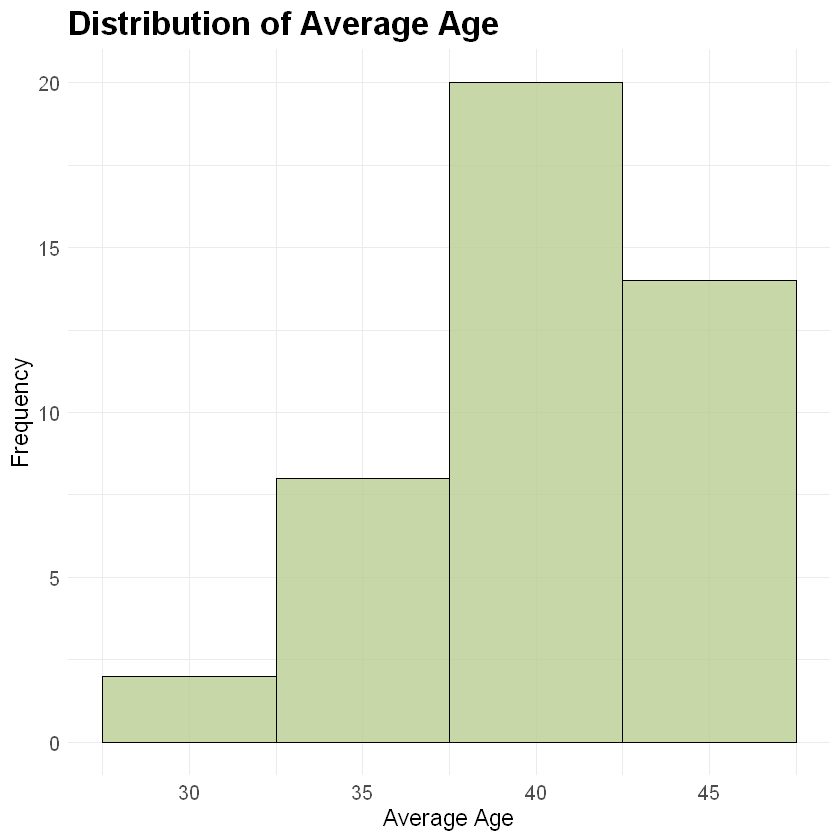

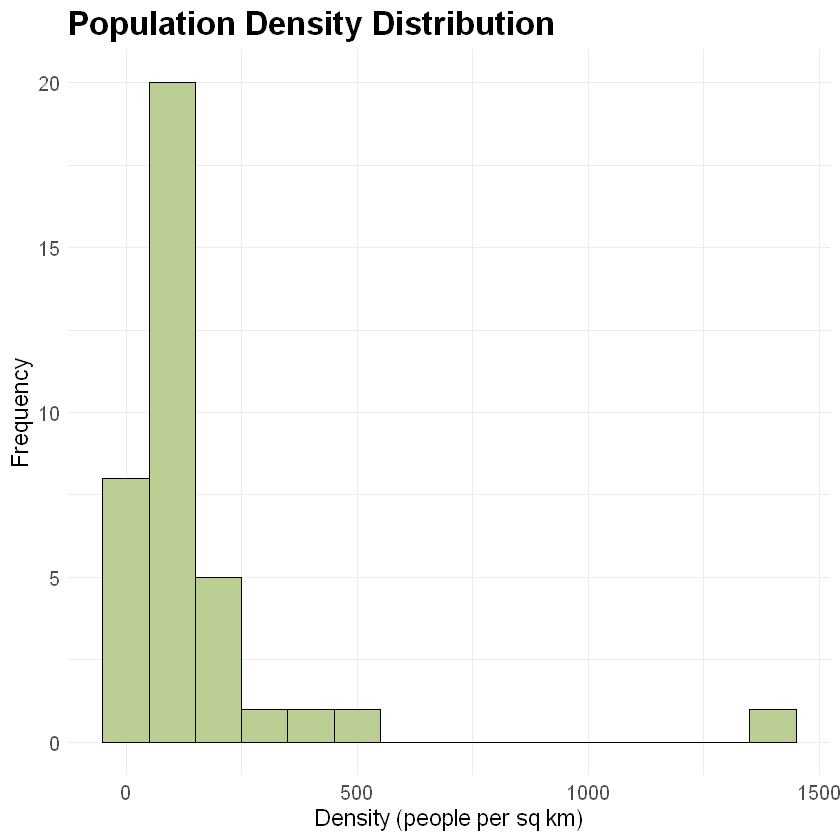

In [20]:
# Age histogram
ggplot(data_age, aes(x=values)) + 
  geom_histogram(binwidth=5, fill="#BACD92", color="black", alpha = 0.8) +
  labs(title = "Distribution of Average Age",
       x = "Average Age",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14))  # Size of axis labels


# Density histogram
ggplot(data_density, aes(x=values)) + 
  geom_histogram(binwidth=100, fill="#BACD92", color="black") +  
  labs(title = "Population Density Distribution",
       x = "Density (people per sq km)",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14))  # Size of axis labels

Na histogramu distribuce průměrného věku vidíme, že největší počet zemí má průměrný věk obyvatelstva kolem 40 let, zatímco distribuce hustoty zalidnění ukazuje, že většina zemí má nízkou hustotu zalidnění, s několika zeměmi výrazně odlišnými s velmi vysokou hustotou.

In [21]:
# Rename
data_age_renamed <- data_age %>% rename(age = values)
data_density_renamed <- data_density %>% rename(density = values)

# Join
combined_data <- left_join(data_age_renamed, data_density_renamed, by = "geo")

# Correlation
correlation_result <- cor(combined_data$age, combined_data$density, use = "complete.obs")
print(correlation_result)

[1] 0.07637682


Korelace ve výši 0,07637682 ukazuje velmi slabou pozitivní souvislost mezi průměrným věkem a hustotou zalidnění. To znamená, že vztah mezi těmito dvěma proměnnými je téměř zanedbatelný a není významným faktorem ve většině ekonomických modelů.

In [22]:
data_hdp_renamed <- data %>% rename(hdp = values)

In [23]:
data1 <- merge(data_hdp_renamed, data_age_renamed, by = "geo")
data2 <- merge(data1, data_density_renamed, by = "geo")

In [24]:
head(data2)

,geo,hdp,age,density
,<chr>,<dbl>,<dbl>,<dbl>
1,Albania,3560,34.7,100.1
2,Austria,39890,43.0,104.9
3,Belgium,36960,41.4,371.8
4,Bulgaria,6380,43.4,66.2
5,Croatia,10810,42.8,74.4
6,Cyprus,21170,37.0,92.0


#### ✦ Jazyk a měna

In [25]:
# Loading data from a CSV file
world_data <- read.csv("world-data-2023.csv", header = TRUE, sep = ",", quote = "\"", dec = ".", fill = TRUE, na.strings = c("", "NA"))

head(world_data)

,Country,Density..P.Km2.,Abbreviation,Agricultural.Land....,Land.Area.Km2.,Armed.Forces.size,Birth.Rate,Calling.Code,Capital.Major.City,Co2.Emissions,⋯,Out.of.pocket.health.expenditure,Physicians.per.thousand,Population,Population..Labor.force.participation....,Tax.revenue....,Total.tax.rate,Unemployment.rate,Urban_population,Latitude,Longitude
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93,Kabul,"8,672",⋯,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.93911,67.709953
2,Albania,105,AL,43.10%,"28,748","9,000",11.78,355,Tirana,"4,536",⋯,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.15333,20.168331
3,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213,Algiers,"150,006",⋯,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.03389,1.659626
4,Andorra,164,AD,40.00%,468,NA,7.20,376,Andorra la Vella,469,⋯,36.40%,3.33,"77,142",NA,NA,NA,NA,"67,873",42.50628,1.521801
5,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244,Luanda,"34,693",⋯,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.20269,17.873887
6,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1,"St. John's, Saint John",557,⋯,24.30%,2.76,"97,118",NA,16.50%,43.00%,NA,"23,800",17.06082,-61.796428


In [26]:
colnames(world_data)

[1] "Country"                                  
 [2] "Density..P.Km2."                          
 [3] "Abbreviation"                             
 [4] "Agricultural.Land...."                    
 [5] "Land.Area.Km2."                           
 [6] "Armed.Forces.size"                        
 [7] "Birth.Rate"                               
 [8] "Calling.Code"                             
 [9] "Capital.Major.City"                       
[10] "Co2.Emissions"                            
[11] "CPI"                                      
[12] "CPI.Change...."                           
[13] "Currency.Code"                            
[14] "Fertility.Rate"                           
[15] "Forested.Area...."                        
[16] "Gasoline.Price"                           
[17] "GDP"                                      
[18] "Gross.primary.education.enrollment...."   
[19] "Gross.tertiary.education.enrollment...."  
[20] "Infant.mortality"                         
[21] "Largest.city"                             
[22] "Life.expectancy"                          
[23] "Maternal.mortality.ratio"                 
[24] "Minimum.wage"                             
[25] "Official.language"                        
[26] "Out.of.pocket.health.expenditure"         
[27] "Physicians.per.thousand"                  
[28] "Population"                               
[29] "Population..Labor.force.participation...."
[30] "Tax.revenue...."                          
[31] "Total.tax.rate"                           
[32] "Unemployment.rate"                        
[33] "Urban_population"                         
[34] "Latitude"                                 
[35] "Longitude"

In [27]:
data_language <- world_data %>% select(Country, Official.language) 

In [28]:
data_language_renamed <- data_language %>% rename(geo = Country, language = Official.language)

In [29]:
data_currency <- world_data %>% select(Country, Currency.Code) 

In [30]:
data_currency_renamed <- data_currency %>% rename(geo = Country, currency = Currency.Code)

In [31]:
summary(data_language_renamed)

     geo              language        
 Length:195         Length:195        
 Class :character   Class :character  
 Mode  :character   Mode  :character  

In [32]:
summary(data_currency_renamed)

     geo              currency        
 Length:195         Length:195        
 Class :character   Class :character  
 Mode  :character   Mode  :character  

In [33]:
data3 <- merge(data_hdp_renamed, data_language_renamed, by = "geo")
data4 <- merge(data3, data_currency_renamed, by = "geo")

In [34]:
head(data4)

,geo,hdp,language,currency
,<chr>,<dbl>,<chr>,<chr>
1,Albania,3560,Albanian,ALL
2,Austria,39890,German,EUR
3,Belgium,36960,French,EUR
4,Bosnia and Herzegovina,7240,Bosnian,BAM
5,Bulgaria,6380,Bulgarian,BGN
6,Croatia,10810,Croatian,HRK


In [35]:
data4 <- data4 %>%
  mutate(language = as.factor(language),
         currency = as.factor(currency))

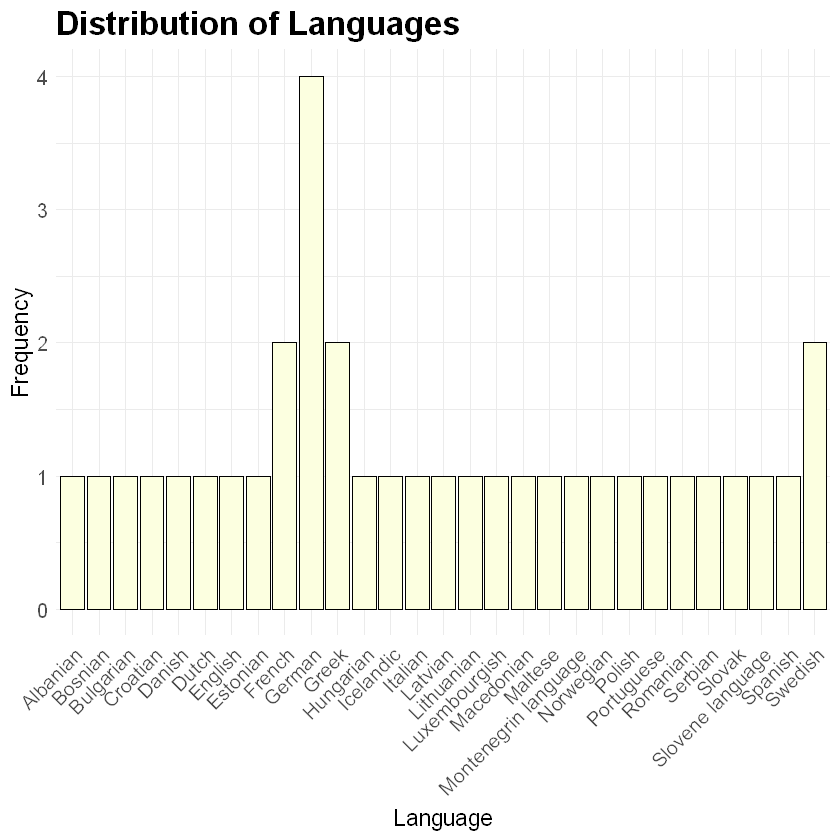

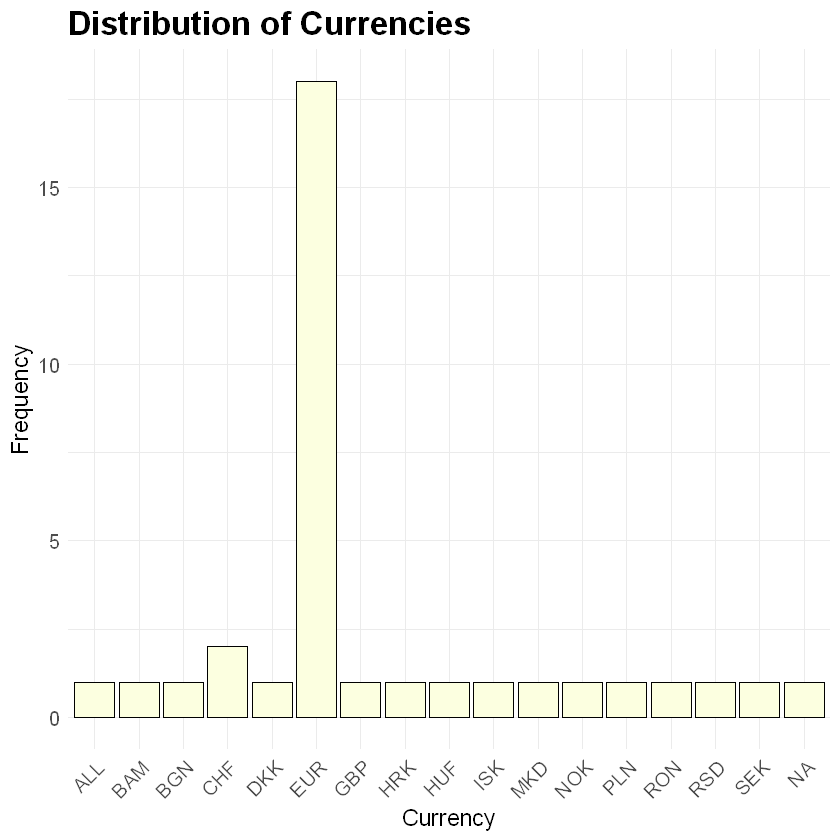

In [36]:
# language barplot
ggplot(data4, aes(x=language)) + 
  geom_bar(fill="#FCFFE0", color="black") +
  labs(title = "Distribution of Languages",
       x = "Language",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

# Currency barplot
ggplot(data4, aes(x=currency)) + 
  geom_bar(fill="#FCFFE0", color="black") +
  labs(title = "Distribution of Currencies",
       x = "Currency",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

In [37]:
table_language_currency <- table(data4$language, data4$currency)

# Fisher's test
fisher_test <- fisher.test(table_language_currency)
print(fisher_test)


	Fisher's Exact Test for Count Data

data:  table_language_currency
p-value = 1.375e-11
alternative hypothesis: two.sided



Výsledky Fisherova přesného testu s p-hodnotou 1.375e-11 ukazují, že mezi jazykem a měnou existuje statisticky významná závislost.

## ✭ Úloha 3

Pomocí lineárního regresního modelu zkoumejme závislost HDP na všech regresorech.

### ✦ Průměrný věk a hustota zalidnění

In [38]:
model1 <- lm(hdp ~ age + density, data = data2)
summary(model1)


Call:
lm(formula = hdp ~ age + density, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-25928 -18463  -8590   7645 114444 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -17192.40   65230.19  -0.264    0.794
age           1120.52    1599.63   0.700    0.489
density         13.14      20.88   0.630    0.533

Residual standard error: 29100 on 33 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.02827,	Adjusted R-squared:  -0.03063 
F-statistic:  0.48 on 2 and 33 DF,  p-value: 0.623


#### ❀ Interpretace hodnot odhadů regresních koeficientů
**Intercept** představuje odhadovanou střední hodnotu závislé proměnné (hdp), pokud jsou všechny nezávislé proměnné (age a density) nulové. V tomto případě je intercept -17192,40, ale není statisticky významný, protože p-hodnota (0,794) je větší než zvolená hladina významnosti (např. 0,05). Proto není vhodné interpretovat intercept v tomto modelu.

**Age** má koeficient 1120,52. To znamená, že při zachování ostatních proměnných se s každou jednotkou zvýšení věku odhadovaná hodnota hdp zvýší o 1120,52 jednotky. Koeficient však není statisticky významný (p-hodnota = 0,489 > 0,05), což naznačuje, že věk nemá v tomto modelu významný lineární vztah s hdp.

**Density** má koeficient 13.14. To znamená, že při zachování ostatních proměnných se při každém jednotkovém zvýšení hustoty odhadovaná hodnota hdp zvýší o 13,14 jednotky. Podobně jako u proměnné věk není koeficient pro hustotu statisticky významný (p-hodnota = 0,533 > 0,05), což naznačuje, že hustota nemusí mít v tomto modelu významný lineární vztah s hdp.

#### ❀ Kvalita modelu
První model je regrese založená na HDP a věku/hustotě zalidnění. Koeficient determinace (Multiple R-squared) je 0,02827, což je hodnota blízká nule; to znamená, že pouze 2,83 % rozptylu závislé proměnné (HDP) je vysvětleno nezávislými proměnnými (věk a hustota). V nejhorším případě bude mít model 𝑅2 = 0, a nejsme od toho daleko. Adjustovaný koeficient determinace je ještě nižší a činí -0,03063 (jeho hodnota bude vždy menší nebo rovna hodnotě 𝑅2). Hodnota menší než 0 opět znamená, že model nemá žádnou vypovídací hodnotu.

F-statistika testuje celkovou významnost regresního modelu. Hodnota F-statistiky se porovnává s prahovou hodnotou, která je odvozena z F-rozdělení. Výsledek testu se zjišťuje pomocí p-hodnoty, která je v našém případě 0.623, což je vyšší než běžná hladina významnosti 0.05. To znamená, že nemáme dostatečné statistické důkazy k závěru, že alespoň jedna z nezávislých proměnných má statisticky významný vliv na závislou proměnnou. Takže F-statistika není statisticky významná a regresní model jako celek taky není významný.

#### ❀ Analýza reziduí

Zajímájí nás především **průměr reziduí** (ideálně hodnota okolo nuly) a **normalita reziduí** (pomocí testu normality).

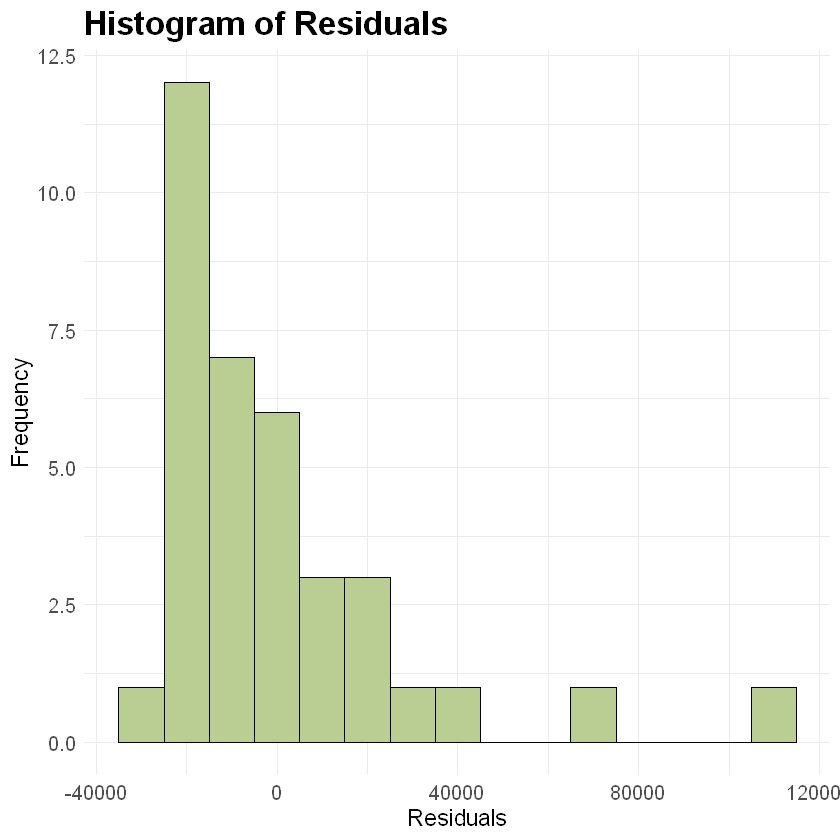

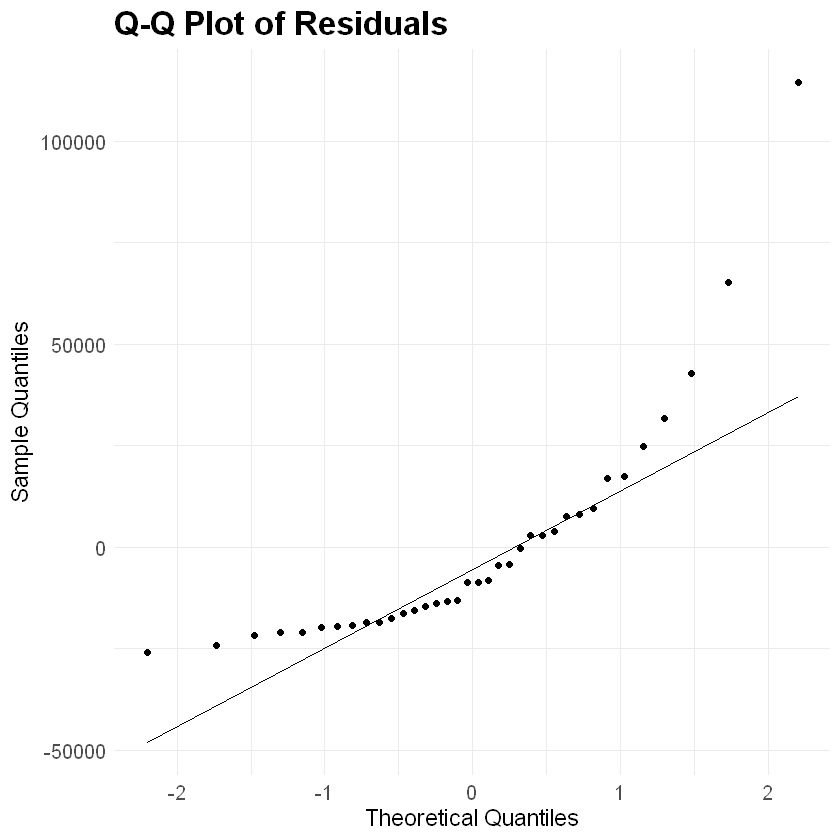

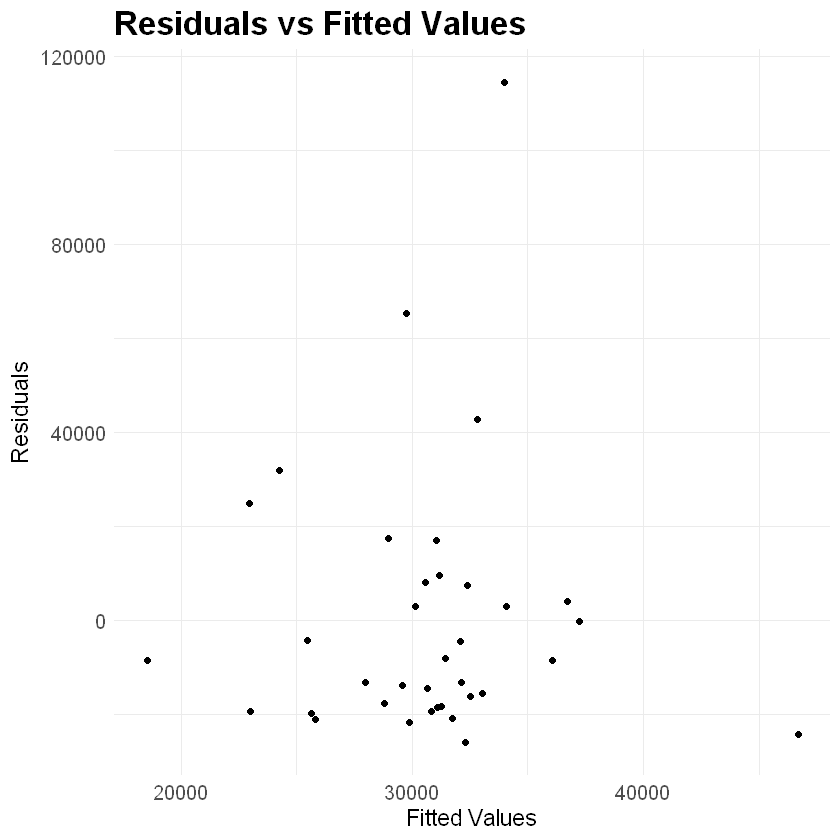

In [39]:
# Histogram of residuals
ggplot(data = data.frame(residuals = resid(model1)), aes(x = residuals)) +
  geom_histogram(binwidth=10000, fill = "#BACD92", color = "black") +
  labs(title = "Histogram of Residuals",
       x = "Residuals",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Q-Q plot of residuals
ggplot(data = data.frame(residuals = resid(model1)), aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot of Residuals",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Plot of residuals vs fitted values
ggplot(data = data.frame(fitted_values = fitted(model1), residuals = resid(model1)), 
                              aes(x = fitted_values, y = residuals)) +
  geom_point(fill = "#FCFFE0", color = "black") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

In [47]:
# Calculate mean of residuals
mean_residuals <- mean(resid(model1))
print(mean_residuals)

# Normality of residuals: Shapiro-Wilk test
shapiro_test <- shapiro.test(resid(model1))
normality <- ifelse(shapiro_test$p.value >= 0.05, "Normally distributed", "Not normally distributed")
print(normality)

[1] 1.252332e-13
[1] "Not Normally Distributed"


Průměr reziduí je hodnota velmi blízká nule, což znamená, že rezidua jsou v průměru soustředěna kolem nuly, což je pro rezidua lineárního regresního modelu žádoucí vlastnost.

Výsledky Shapiro-Wilkova testu ukazují, že p-hodnota je nižší než hladina významnosti 0,05. Proto zamítáme nulovou hypotézu o normalitě, což znamená, že rezidua nejsou normálně rozdělena.

#### ❀ Odlehlá pozorování a multikolinearita

Odlehlé hodnoty identifikujeme pomocí Cookovy vzdálenosti. Multikolinearitu zkoumáme pomocí VIF a korelační matice.

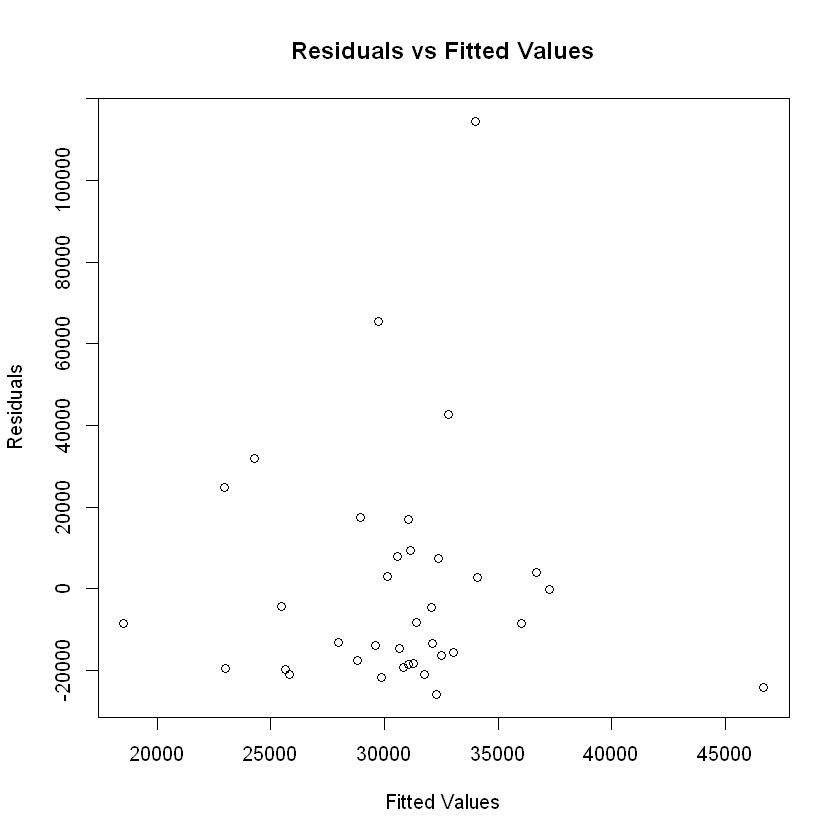

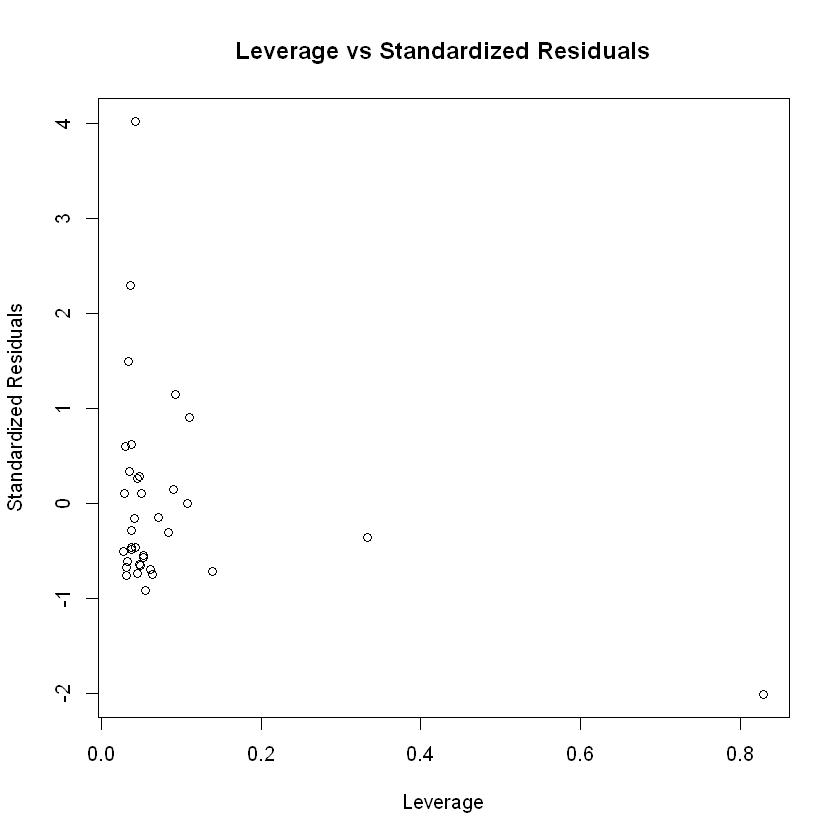

[1] "VIF values:"
     age  density 
1.005868 1.005868 
[1] "Correlation Matrix:"
        age density
age       1      NA
density  NA       1


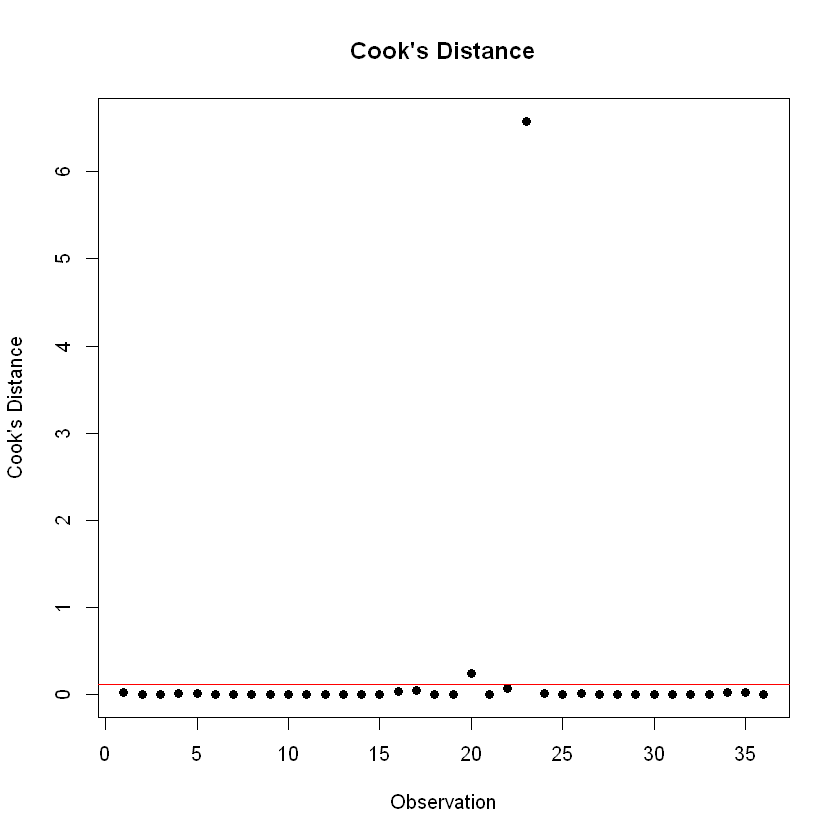

In [41]:
# Identify outliers
# Residual Analysis
plot(fitted(model1), resid(model1), main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

# Leverage-Residual plot
plot(hatvalues(model1), rstandard(model1), main = "Leverage vs Standardized Residuals", xlab = "Leverage", ylab = "Standardized Residuals")

# Cook's distance
cooks_dist <- cooks.distance(model1)
plot(cooks_dist, pch = 19, main = "Cook's Distance", xlab = "Observation", ylab = "Cook's Distance")
abline(h = 4/length(cooks_dist), col = "red")  # Highlight a threshold for influential observations

# Explore multicollinearity
# VIF
vif_values <- vif(model1)
print("VIF values:")
print(vif_values)

# Correlation matrix
correlation_matrix <- cor(data2[, c("age", "density")])
print("Correlation Matrix:")
print(correlation_matrix)

**VIF (Variance Inflation Factor)** měří míru multikolinearity mezi predikčními proměnnými. Hodnoty VIF blízké 1 naznačují, že rozptyl odhadů koeficientů těchto proměnných není nafouknutý v důsledku multikolinearity. Obvykle se za přijatelné považují hodnoty VIF nižší než 5 nebo 10, což odpovídá nízké multikolinearitě.
V našem případě jsou hodnoty VIF pro "age" i "density" přibližně 1. To znamená, že mezi těmito predikčními proměnnými neexistuje významná multikolinearita.

**Korelační matice** ukazuje párové korelační koeficienty mezi predikčními proměnnými. Korelační koeficient 1 nebo -1 znamená dokonalou pozitivní, resp. negativní korelaci. Korelační koeficient blízký 0 naznačuje, že mezi proměnnými neexistuje lineární korelace.
V našem výstupu není k dispozici korelační koeficient mezi "age" a "density" (NA). To znamená, že mezi těmito dvěma proměnnými neexistuje žádná korelace.

Otestujeme předpoklady modelu - pokud nebudou splněny, vyvíjíme a otestujeme metody, které toto selhání kompenzují nebo předpoklady odstraňují. Na to použijeme ANOVA test rozptylu. Stanovíme příslušné hypotézy.

**● Proměnná "age"**

$H_0:$ Koeficient proměnné "age" v regresním modelu je roven nule.

$H_A:$ Koeficient proměnné "age" v regresním modelu není roven nule (což naznačuje významný vliv na závislou proměnnou).

**● Proměnná "density"**

$H_0:$ Koeficient proměnné "density" v regresním modelu je roven nule.

$H_A:$ Koeficient proměnné "density" v regresním modelu není roven nule (což naznačuje významný vliv na závislou proměnnou).

In [42]:
# Fit the linear regression model
model1 <- lm(hdp ~ age + density, data = data2)

# Perform ANOVA test
anova_result <- anova(model1)

# Print ANOVA table
print(anova_result)

Analysis of Variance Table

Response: hdp
          Df     Sum Sq   Mean Sq F value Pr(>F)
age        1 4.7714e+08 477144991  0.5636 0.4581
density    1 3.3551e+08 335510159  0.3963 0.5333
Residuals 33 2.7936e+10 846540567               


Na základě výsledků ANOVA vyvozujeme závěry.

Proměnná "age": p-hodnota (0,4581) je vyšší než zvolená hladina významnosti (0,05). Nulovou hypotézu pro „věk“ tedy nezamítáme. Není dostatek důkazů pro závěr, že věk má významný vliv na HDP.

Proměnná "density": p-hodnota (0.5333) je opět vyšší než zvolená hladina významnosti. Proto nezamítáme nulovou hypotézu ani pro hustotu. Neexistuje dostatek důkazů pro závěr, že hustota má významný vliv na HDP.

Na základě výsledků testu ANOVA se zdá, že ani věk, ani hustota zalidnění nejsou významnými prediktory HDP v tomto regresním modelu.

Nyní nakreslíme grafy, které odhalí vztah mezi závislou proměnnou HDP a proměnnými age/density.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


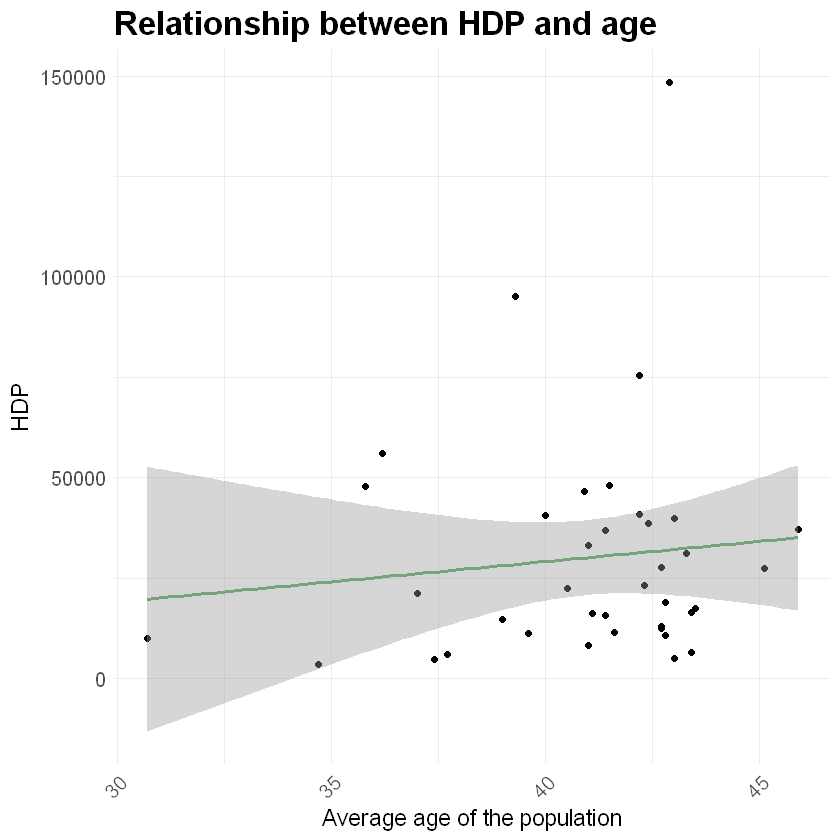

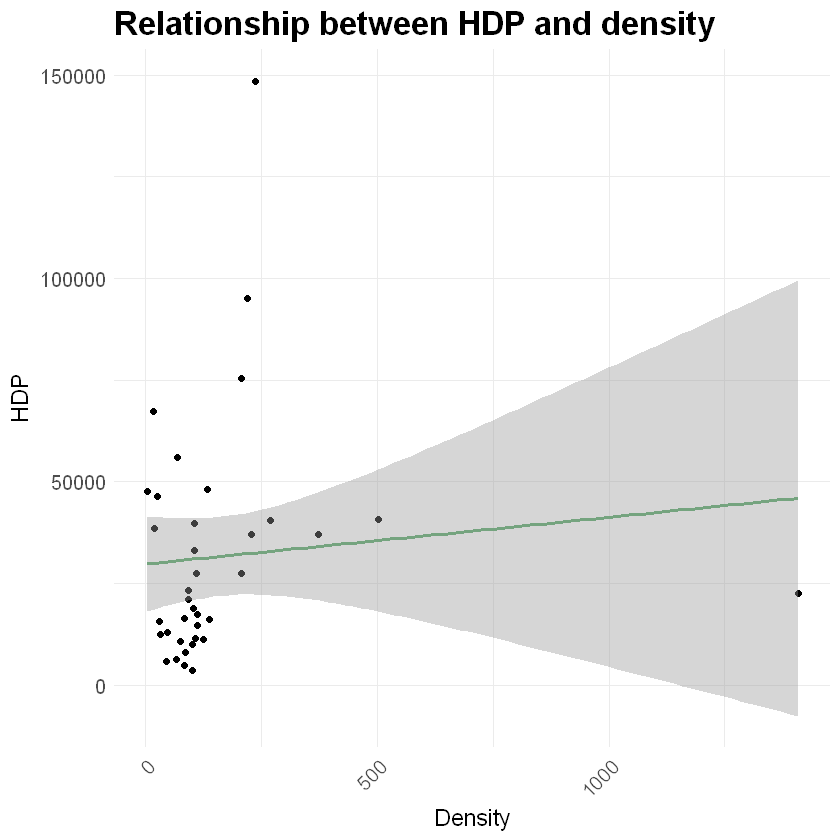

In [43]:
# HDP/Age
ggplot(data2, aes(x = age, y = hdp)) +
  geom_point() +
  geom_smooth(method = "lm", col = "#75A47F") +
  labs(title = "Relationship between HDP and age",
       x = "Average age of the population",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

# HDP/Density
ggplot(data2, aes(x = density, y = hdp)) +
  geom_point() +
  geom_smooth(method = "lm", col = "#75A47F") +
  labs(title = "Relationship between HDP and density",
       x = "Density",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

Grafy ukazují, že i když existuje pozitivní trend mezi průměrným věkem obyvatelstva a HDP, a negativní trend mezi hustotou obyvatelstva a HDP, oba tyto vztahy nejsou statisticky významné, což potvrzují analýzy regresních modelů.

### ✦ Jazyk a měna

In [44]:
model2 <- lm(hdp ~ language + currency, data = data4)
summary(model2)


Call:
lm(formula = hdp ~ language + currency, data = data4)

Residuals:
         1          2          3          4          5          6          7 
 1.595e-11  1.420e+03  1.970e+03  6.052e-14  2.199e-12  5.082e-13  2.435e+03 
         8          9         10         11         12         13         14 
 3.464e-12 -4.068e-12  3.191e-11 -1.970e+03 -1.420e+03 -2.435e+03  2.524e-13 
        15         16         17         18         19         20         21 
 6.503e-13 -1.169e-12 -1.737e-12  3.646e+04  5.934e-13 -1.112e-12 -1.271e-11 
        22         24         25         26         27         28         29 
 3.208e-12  1.332e-12  5.027e-12  6.391e-12 -1.339e-12 -1.339e-12 -1.339e-12 
        30         31         32         33         34         35 
-2.703e-12  2.753e-12  2.499e-14 -2.635e-11 -3.646e+04 -4.866e-13 

Coefficients: (13 not defined because of singularities)
                             Estimate Std. Error t value Pr(>|t|)
(Intercept)                      3560      258

#### ❀ Interpretace hodnot odhadů regresních koeficientů
**Intercept** má hodnotu 3560. Tato hodnota není statisticky významná, protože p-hodnota je vyšší než obvyklá hladina významnosti 0.05. To naznačuje, že průměrná hodnota závislé proměnné není statisticky odlišná od nuly, když jsou všechny nezávislé proměnné nulové.

**Regresní koeficienty pro jazyk (Language)** odpovídají odhadovanému rozdílu v hodnotě závislé proměnné mezi jednotlivými jazyky a referenčním jazykem (v tomto případě je referenčním jazykem angličtina). Interpretace každého koeficientu je založena na srovnání s referenčním jazykem. Například, pokud je regresní koeficient pro dáný jazyk pozitivní, znamená to, že průměrná hodnota závislé proměnné je vyšší pro tento jazyk ve srovnání s referenčním jazykem. Například regresní koeficient pro jazyk švédština je 42920. To znamená, že průměrná hodnota závislé proměnné je o 42920 vyšší pro švédštinu ve srovnání s referenčním jazykem (pravděpodobně angličtinou). P-hodnota pro každý regresní koeficient udává statistickou významnost regresního koeficientu. Například, p-hodnota pro švédštinu je 0.306, což naznačuje, že tento regresní koeficient není statisticky významný při konvenční hladině významnosti 0.05.

**Regresní koeficienty pro měnu (Currency)** mají podobnou interpretaci jako koeficienty pro měnu. Např. regresní koeficient pro švýcarský frank (CHF) je 65605. To znamená, že průměrná hodnota závislé proměnné je o 65605 vyšší pro transakce v CHF ve srovnání s referenční měnou. Opět p-hodnota udává statistickou významnost regresního koeficientu.

#### ❀ Kvalita modelu
Druhý model ukazuje vztah mezi HDP a jazykem/měnou. Zde vidíme mnohem vyšší koeficient determinace (0,9103), blíží se 1, což naznačuje, že model vysvětluje 91.03% variability závislé proměnné. Máme ale poměrně nízký adjustovaný koeficient determinace (0,26), což může znamenat, že náš model je přeučený. Jinými slovy, model může zachycovat šum nebo náhodné asociace v datech, což vede k přeučení.

F-statistika testuje celkovou významnost regresního modelu. P-hodnota pro F-statistiku udává statistickou významnost modelu jako celku. V tomto případě je p-hodnota 0.4111, což naznačuje, že model jako celek není statisticky významný při konvenční hladině významnosti 0.05.

#### ❀ Analýza reziduí

Analyzujeme stejná kritéria jako v prvním modelu.

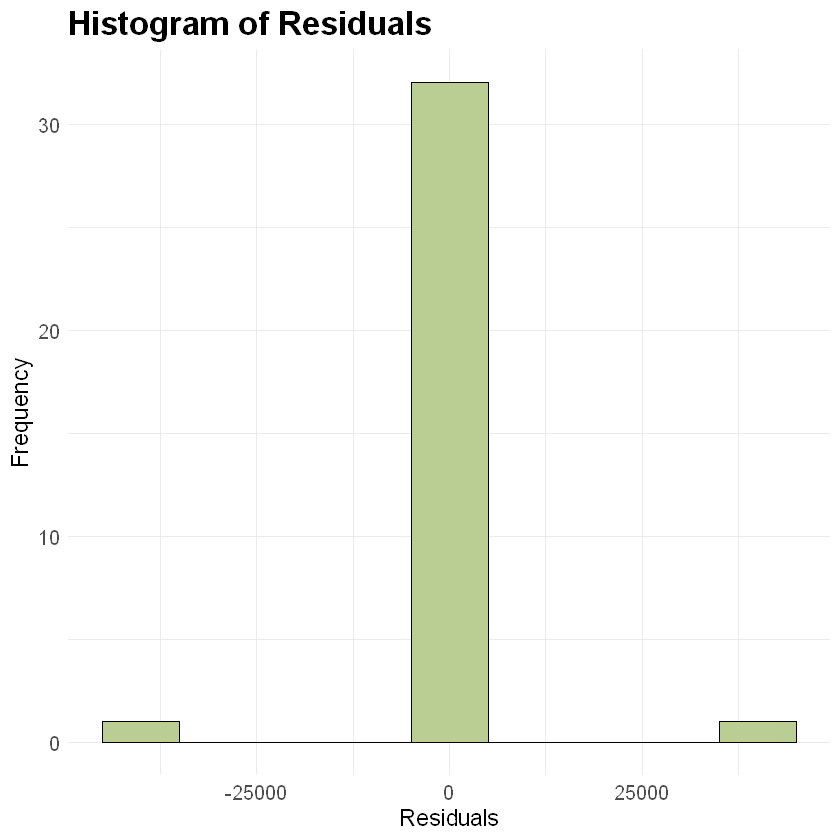

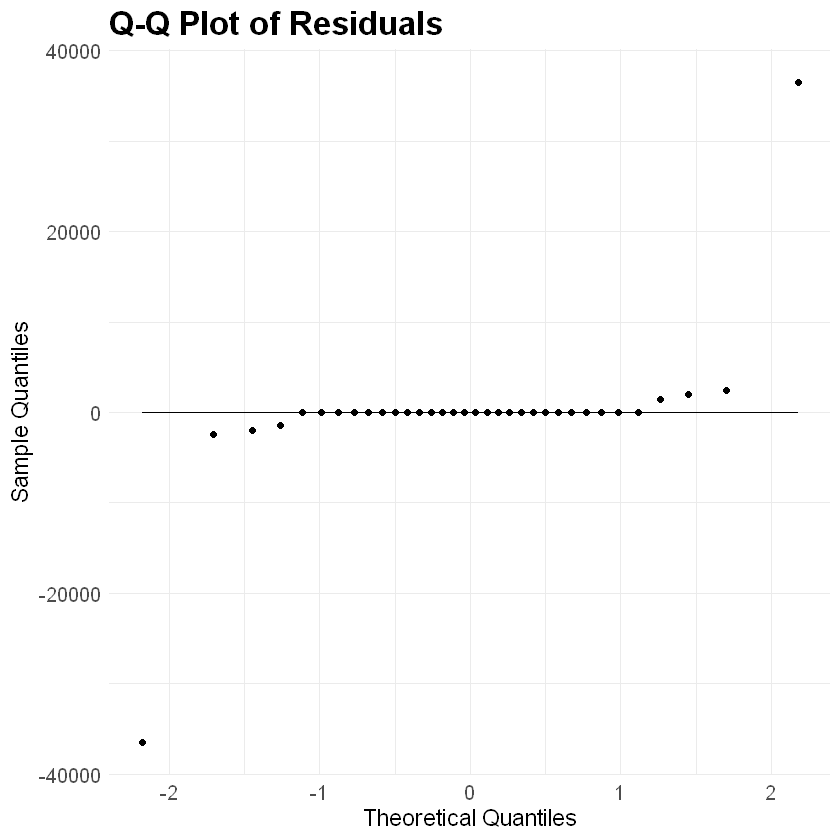

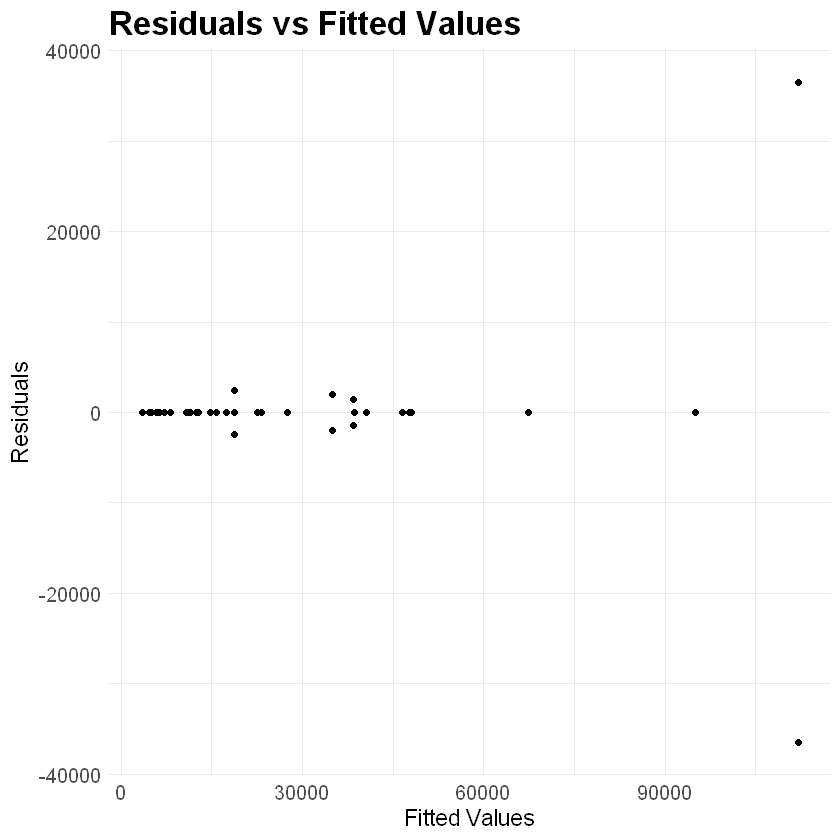

In [49]:
# Histogram of residuals
ggplot(data = data.frame(residuals = resid(model2)), aes(x = residuals)) +
  geom_histogram(binwidth = 10000, fill = "#BACD92", color = "black") +
  labs(title = "Histogram of Residuals",
       x = "Residuals",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Q-Q plot of residuals
ggplot(data = data.frame(residuals = resid(model2)), aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot of Residuals",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Plot of residuals vs fitted values
ggplot(data = data.frame(fitted_values = fitted(model2), residuals = resid(model2)), 
                              aes(x = fitted_values, y = residuals)) +
  geom_point(fill = "#FCFFE0", color = "black") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

In [51]:
# Calculate mean of residuals
mean_residuals <- mean(resid(model2))
print(mean_residuals)

# Normality of residuals: Shapiro-Wilk test
shapiro_test <- shapiro.test(resid(model2))
normality <- ifelse(shapiro_test$p.value >= 0.05, "Normally distributed", "Not normally distributed")
print(normality)

[1] -1.412809e-13
[1] "Not normally distributed"


Průměr reziduí je přibližně $-1.41 \times 10^{-13}$. Stejně jako v předchozím případě je tento průměr velmi blízko nule, což znamená, že rezidua jsou v průměru soustředěna kolem nuly. Výsledky Shapiro-Wilkova testu ukazují, že p-hodnota je nižší než hladina významnosti 0,05. Proto zamítáme nulovou hypotézu o normalitě a docházíme k závěru, že rezidua nejsou normálně rozdělena.

#### ❀ Odlehlá pozorování a multikolinearita

Analogicky jako v prvním modelu.

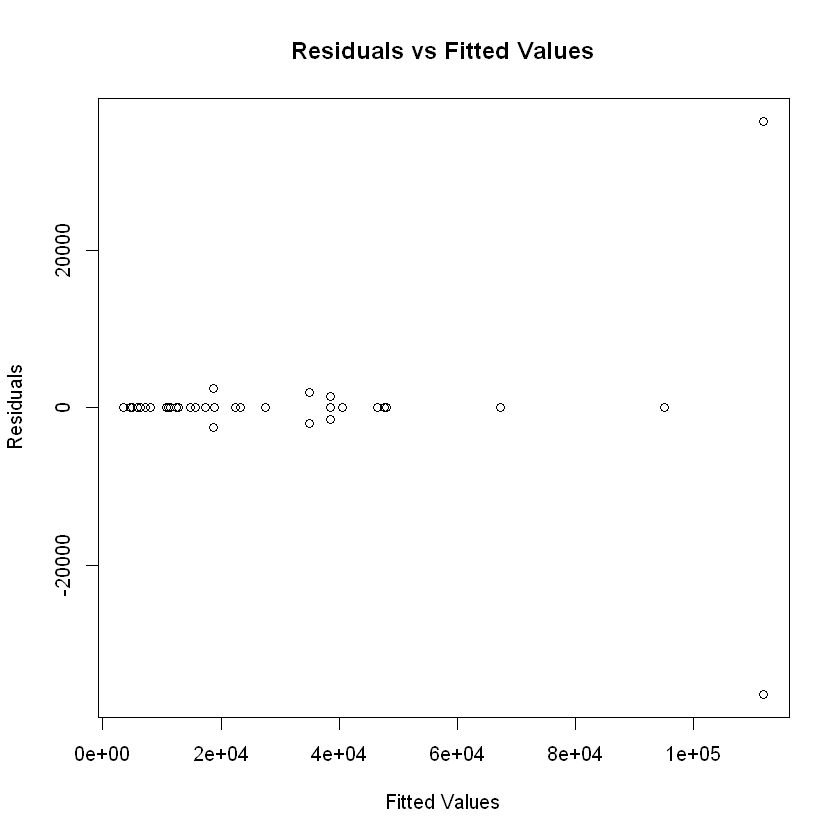

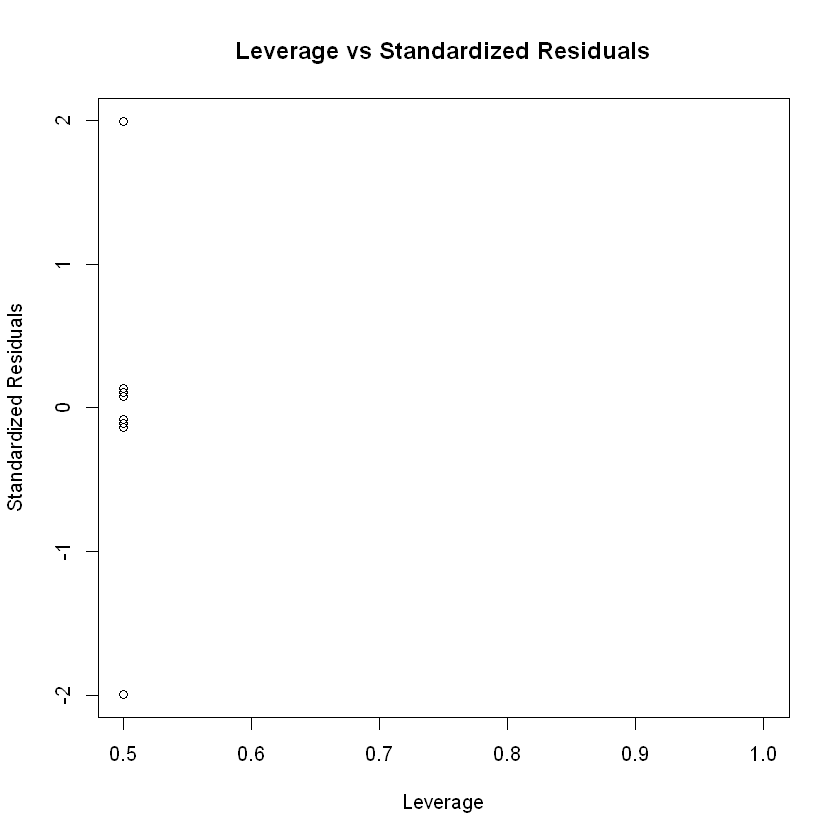

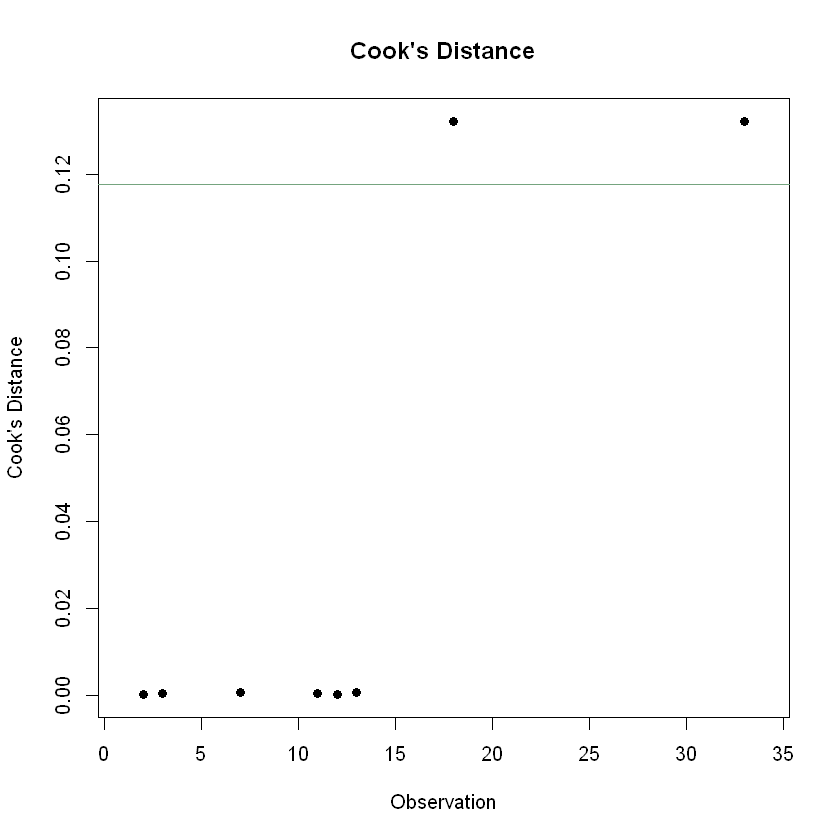

In [59]:
# Identify outliers
# Residual Analysis
plot(fitted(model2), resid(model2), main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

# Leverage-Residual plot
plot(hatvalues(model2), rstandard(model2), main = "Leverage vs Standardized Residuals", xlab = "Leverage", ylab = "Standardized Residuals")

# Cook's distance
cooks_dist <- cooks.distance(model2)
plot(cooks_dist, pch = 19, main = "Cook's Distance", xlab = "Observation", ylab = "Cook's Distance")
abline(h = 4/length(cooks_dist), col = "#75A47F")  # Highlight a threshold for influential observations

U kategoriální a spojité proměnné lze multikolinearitu měřit pomocí t-testu (pokud má kategoriální proměnná 2 kategorie) nebo ANOVA (pokud má více než 2 kategorie). ANOVA test stejně potřebujeme při zkoumání hypotéz, takže pustíme se do toho.

In [71]:
# Perform ANOVA test
anova_result <- anova(model2)

# Print ANOVA table
print(anova_result)

Analysis of Variance Table

Response: hdp
          Df     Sum Sq    Mean Sq F value Pr(>F)
language  27 2.1780e+10  806665449  1.2033 0.4828
currency   2 5.4357e+09 2717869638  4.0541 0.1091
Residuals  4 2.6816e+09  670396775               


multikolinearita

Otestujeme předpoklady modelu - pokud nebudou splněny, vyvíjíme a otestujeme metody, které toto selhání kompenzují nebo předpoklady odstraňují. Na to použijeme ANOVA test rozptylu. Stanovíme příslušné hypotézy.

**● Proměnná "language"**

$H_0:$ Proměnná "language" nemá významný vliv na proměnnou "HDP".

$H_A:$ Alespoň jedna z kategorie proměnné "language" má významný vliv na proměnnou "HDP".

**● Proměnná "currency"**

$H_0:$ Proměnná "currency" nemá významný vliv na proměnnou "HDP".

$H_A:$ Alespoň jedna z kategorie proměnné "currency" má významný vliv na proměnnou "HDP".

Proměnná "language": p-hodnota je 0,4828, což je více než hladina významnosti 0,05. Nulovou hypotézu tedy nezamítáme. Z toho vyplývá, že kategorie jazyka nemají významný vliv na HDP.

Proměnná "currency": p-hodnota je 0.1091, která je yase větší než 0,05. Nulovou hypotézu tedy nezamítáme ani v případě měny. To znamená, že kategorie měny nemají na HDP žádný významný vliv.

A opět dva grafy, které ukazují vztah mezi HDP a (tentokrát) jazykem/měnou.

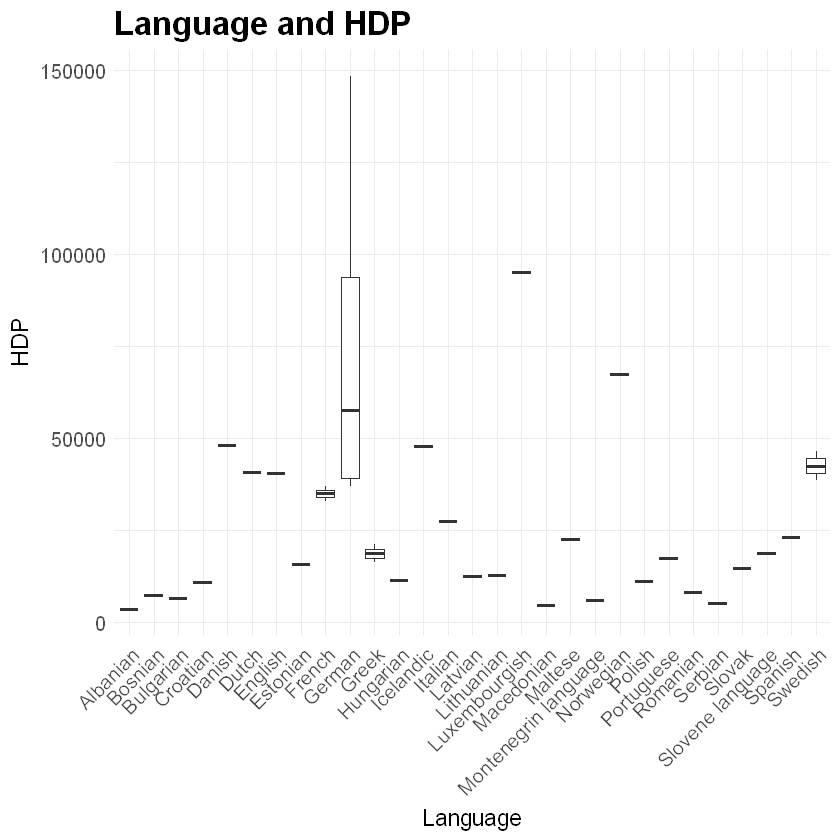

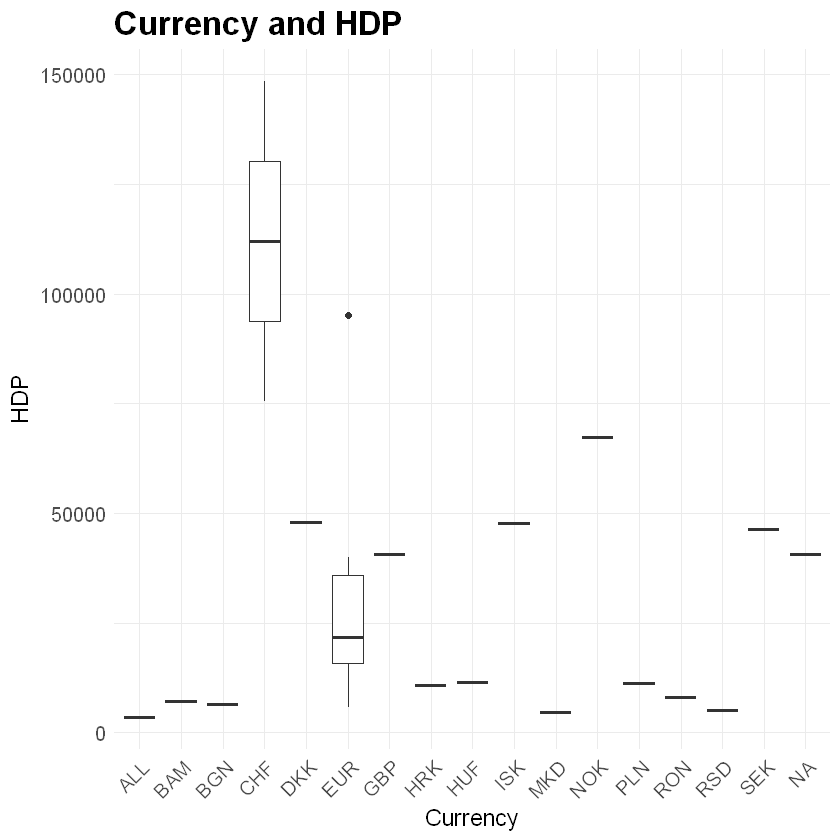

In [41]:
# HDP/Language
ggplot(data4, aes(x = language, y = hdp)) +
  geom_boxplot() +
  labs(title = "Language and HDP",
       x = "Language",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

# HDP/Currency
ggplot(data4, aes(x = currency, y = hdp)) +
  geom_boxplot() +
  labs(title = "Currency and HDP",
       x = "Currency",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

Grafy ukazují, že existují výrazné rozdíly v HDP v závislosti na používané měně a jazyce, přičemž některé měny jako CHF a GBP a jazykové skupiny jako německá a francouzská mají tendenci být spojeny s vyšším HDP.

Nyní se pokusíme najít finální model, který chování HDP dobře vysvětluje, ale neobsahuje nevýznamné komponenty.

In [75]:
str(data4)

'data.frame':	35 obs. of  4 variables:
 $ geo     : chr  "Albania" "Austria" "Belgium" "Bosnia and Herzegovina" ...
 $ hdp     : num  3560 39890 36960 7240 6380 ...
 $ language: Factor w/ 29 levels "Albanian","Bosnian",..: 1 10 9 2 3 4 11 5 8 29 ...
 $ currency: Factor w/ 16 levels "ALL","BAM","BGN",..: 1 6 6 2 3 8 6 5 6 6 ...


In [74]:
str(data2)

'data.frame':	40 obs. of  4 variables:
 $ geo    : chr  "Albania" "Austria" "Belgium" "Bulgaria" ...
 $ hdp    : num  3560 39890 36960 6380 10810 ...
 $ age    : num  34.7 43 41.4 43.4 42.8 37 41.1 41.5 41.4 43.3 ...
 $ density: num  100.1 104.9 371.8 66.2 74.4 ...


In [78]:
# Merge datasets based on 'geo' and 'hdp' columns
merged_data <- merge(data4, data2, by = c("geo", "hdp"), all = TRUE)

In [79]:
str(merged_data)

'data.frame':	41 obs. of  6 variables:
 $ geo     : chr  "Albania" "Austria" "Belgium" "Bosnia and Herzegovina" ...
 $ hdp     : num  3560 39890 36960 7240 6380 ...
 $ language: Factor w/ 29 levels "Albanian","Bosnian",..: 1 10 9 2 3 4 11 NA 5 8 ...
 $ currency: Factor w/ 16 levels "ALL","BAM","BGN",..: 1 6 6 2 3 8 6 NA 5 6 ...
 $ age     : num  34.7 43 41.4 NA 43.4 42.8 37 41.1 41.5 41.4 ...
 $ density : num  100.1 104.9 371.8 NA 66.2 ...


In [80]:
# Fitting the model with all regressors
fit_all <- lm(hdp ~ age + density + language + currency, data=merged_data)

# Model summary
summary(fit_all)


Call:
lm(formula = hdp ~ age + density + language + currency, data = merged_data)

Residuals:
         1          2          3          5          6          7          9 
 2.805e-11  3.475e+03 -2.539e+03 -4.964e-14 -6.181e-13  2.199e+03 -7.318e-13 
        10         14         15         16         17         18         19 
 1.777e-13  2.286e-11  2.539e+03 -3.475e+03 -2.199e+03 -2.551e-12 -3.907e-13 
        21         22         23         24         25         26         27 
-1.414e-12  1.201e-12  3.595e+04 -8.455e-13  1.052e-11 -1.542e-12 -2.778e-12 
        29         31         32         33         35         36         37 
-1.414e-12 -1.727e-12 -1.414e-12 -1.034e-11 -2.011e-12 -5.044e-13 -2.153e-12 
        38         39         41 
-3.822e-11 -3.595e+04  2.496e-14 

Coefficients: (10 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)
(Intercept)                    1022.08  256660.93   0.004    0.997
age                   

Z výsledků modelu můžeme vidět, které regresory jsou statisticky významné a které ne.